In [3382]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3383]:
df=pd.read_csv("leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3384]:
#inspecting the shape of the dataset
df.shape

(9240, 37)

In [3385]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [3386]:
#checking the summary of the datset
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [3387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### data cleaning 

In [3389]:
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [3390]:
#As it is clearly seen there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. 
#Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

### dropping

In [3392]:
for d in df.columns:
    if df[d].isnull().sum()>3000:
        df.drop(d, axis=1, inplace= True)
    

In [3393]:
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [3394]:
#checking value counts of "City" column
df['City'].value_counts(dropna=False)  #dropna doesnot include counts of nan

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [3395]:
#it is clearly seen that maximum leads are from mumbai--it doesnot matter from where the lead is here
#the variable City won't be of any use in our analysis. So it's best that we drop it.

# dropping the city column

In [3397]:
df.drop('City', axis=1, inplace = True)

In [3398]:
len(df)

9240

In [3399]:
#same goes for country
#checking value counts of "Country" column
df['Country'].value_counts(dropna=False) #highest number of leads are from india

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [3400]:
df.drop('Country', axis=1, inplace = True)

In [3401]:
# Calculate the percentage of missing values in each column

In [3402]:
round(100*df.isnull().sum()/len(df),2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
X Education Forums                                0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect I

In [3403]:
df.isnull().sum().sort_values(ascending=False) #checking null values again

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

In [3404]:
#there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. 
#These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [3405]:
# checking the value counts of all the columns
for c in df.columns:
    print(df[c].astype('category').value_counts())
    print('***********************************') #in the column specialization the count is 1942---in the next one --it 5043--lead profile has 4146

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
***********************************
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
***********************************
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
********************************

### the following three columns have "select"---checking them one by one

In [3407]:
df.Specialization.value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

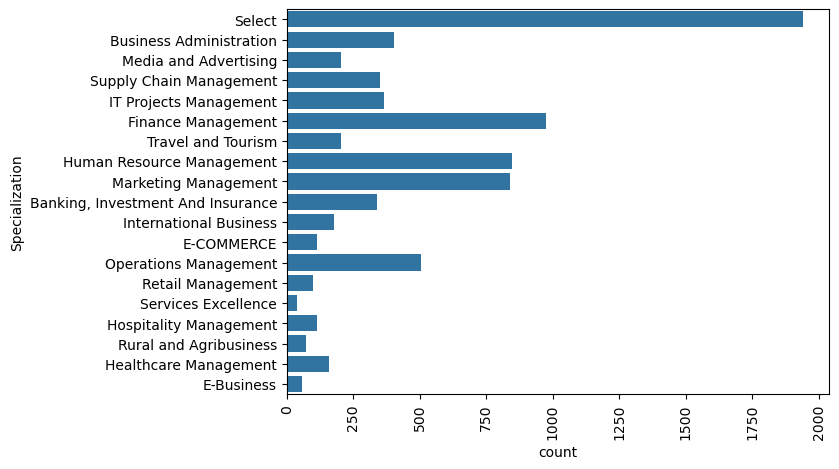

In [3408]:
#univariate analysis for categorical column
plt.figure(figsize=(7,5))
sns.countplot(df['Specialization'],)
plt.xticks(rotation=90)
plt.show()

In [3409]:
df['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

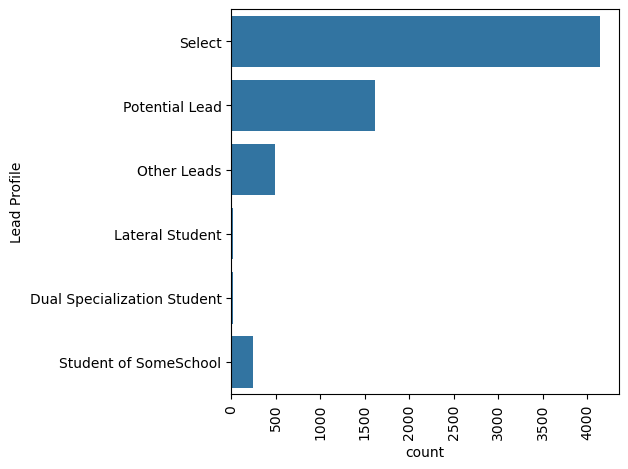

In [3410]:
plt.figure(figsize=(5,5))
sns.countplot(df['Lead Profile'],)
plt.xticks(rotation=90)
plt.show()

In [3411]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

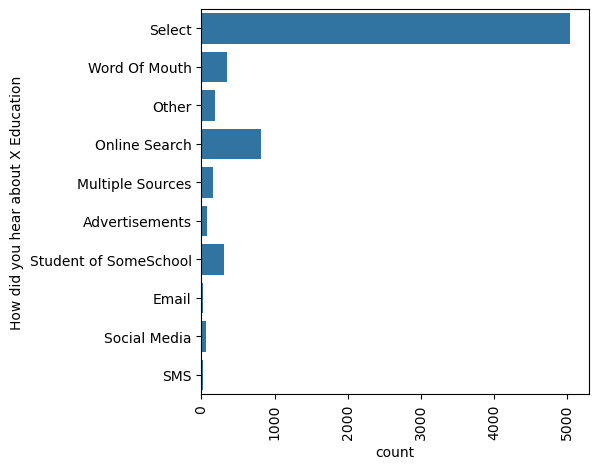

In [3412]:
plt.figure(figsize=(5,5))
sns.countplot(df['How did you hear about X Education'],)
plt.xticks(rotation=90)
plt.show()

In [3413]:
#As it can be seen that the levels of "Lead Profile" and "How did you hear about X Education" 
#have a lot of rows which have the value Select which is of no use to the analysis

### dropping these two

In [3415]:
df.drop(["Lead Profile","How did you hear about X Education"], axis= 1, inplace = True)

In [3416]:
#Also we notice that, when we got the value counts of all the columns,there were a few columns in which only one value was majorly present for all the
#data points.These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement,Through Recommendations, 
#Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque.
#Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

In [3417]:
#dropping
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [3418]:
#inspecting "What matters most to you in choosing a course"
df['What matters most to you in choosing a course'].value_counts() #there is no much variety

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [3419]:
#conclusion---What matters most to you in choosing a course has the level Better Career Prospects 6528 times
#while the other two levels appear once twice and once respectively---dropping it as well


In [3420]:
df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [3421]:
df.shape

(9240, 14)

In [3422]:
# Checking the number of null values again
df.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [3423]:
#the column What is your current occupation which has a lot of null values. Now you can drop the entire row but since we have already lost so many 
#feature variables, we choose not to drop it as it might turn out to be significant in the analysis.So let's just drop the null rows for the column
#What is you current occupation.

In [3424]:
# Dropping the null values rows in the column 'What is your current occupation'
df = df[~pd.isnull(df['What is your current occupation'])]

In [3425]:
# Checking the number of null values again
df.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [3426]:
#Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [3427]:
df = df[~pd.isnull(df['TotalVisits'])]

In [3428]:
df = df[~pd.isnull(df['Page Views Per Visit'])]

In [3429]:
df = df[~pd.isnull(df['Last Activity'])]

In [3430]:
df = df[~pd.isnull(df['Lead Source'])]

In [3431]:
df = df[~pd.isnull(df['Specialization'])]

In [3432]:
# Checking the number of null values again
df.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [3433]:
len(df)

6373

In [3434]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [3435]:
#prospect id and lead number is of no use--dropping these two
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

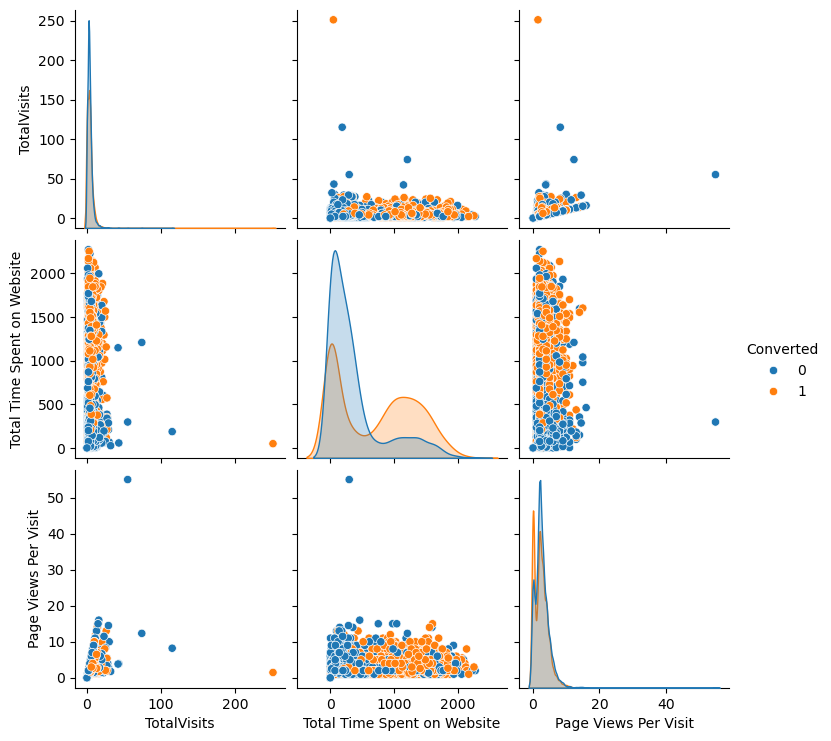

In [3436]:
sns.pairplot(df,diag_kind='kde',hue='Converted')
plt.show()

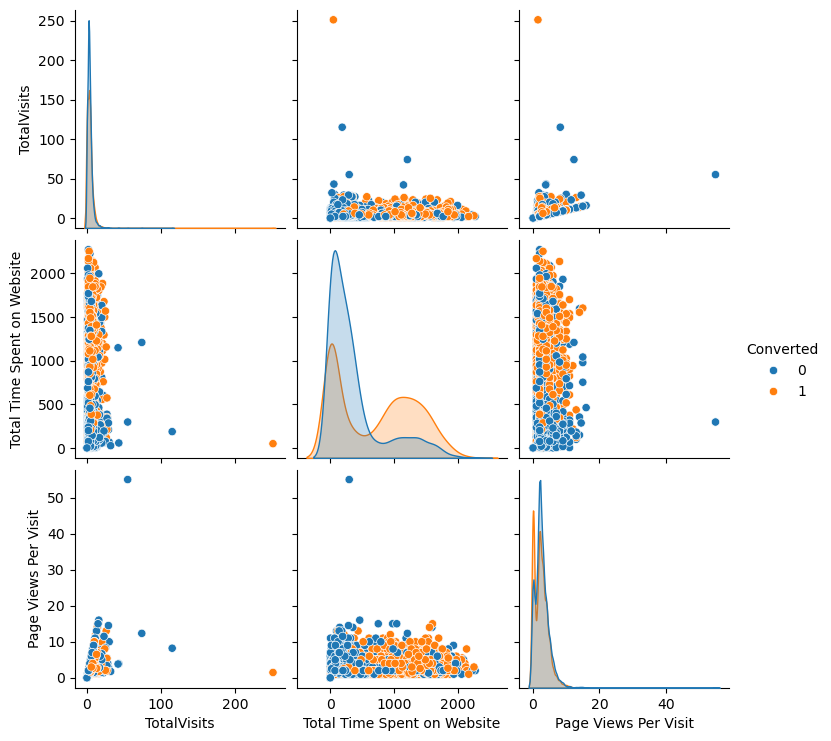

In [3437]:
cols = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(cols,diag_kind='kde',hue='Converted')
plt.show()

In [3438]:
#univariate analysis
df['Lead Origin'].value_counts()


Lead Origin
Landing Page Submission    3625
API                        2140
Lead Add Form               581
Lead Import                  27
Name: count, dtype: int64

([0, 1, 2, 3],
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

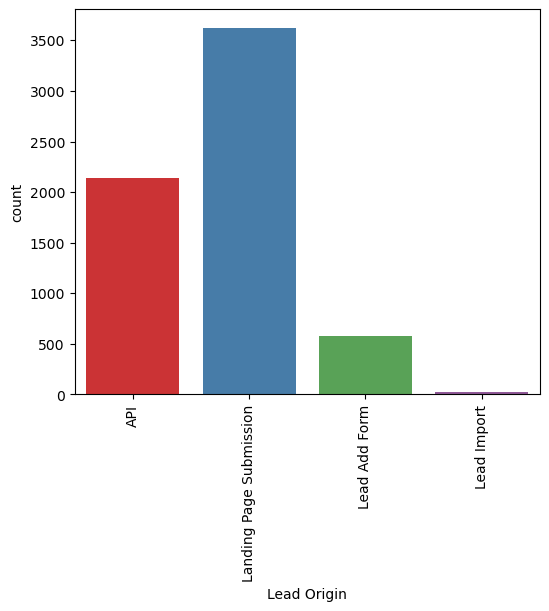

In [3439]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x = "Lead Origin",palette='Set1')
plt.xticks(rotation = 90)

([0, 1, 2, 3],
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

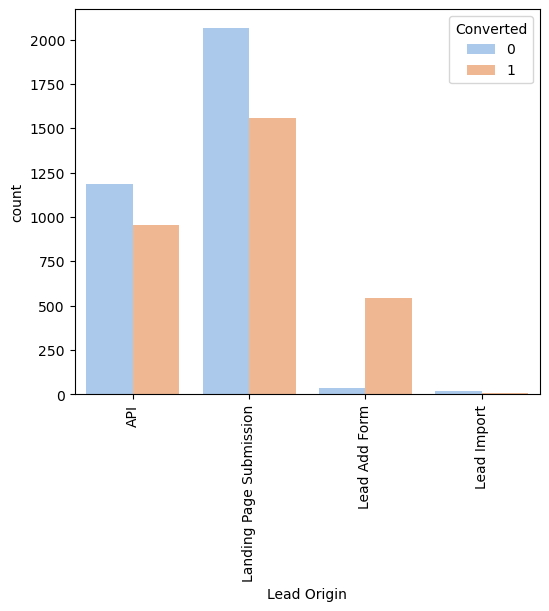

In [3440]:
plt.figure(figsize=(6,5))
#bivariate analysis
sns.countplot(data=df, x = "Lead Origin", hue='Converted',palette='pastel')
plt.xticks(rotation = 90)

In [3441]:
#    1.Lead Import are very less in count.
#   2. API and Landing Page Submission have more leads than the converted ones
#   3. Lead Add Form have good conversion rate

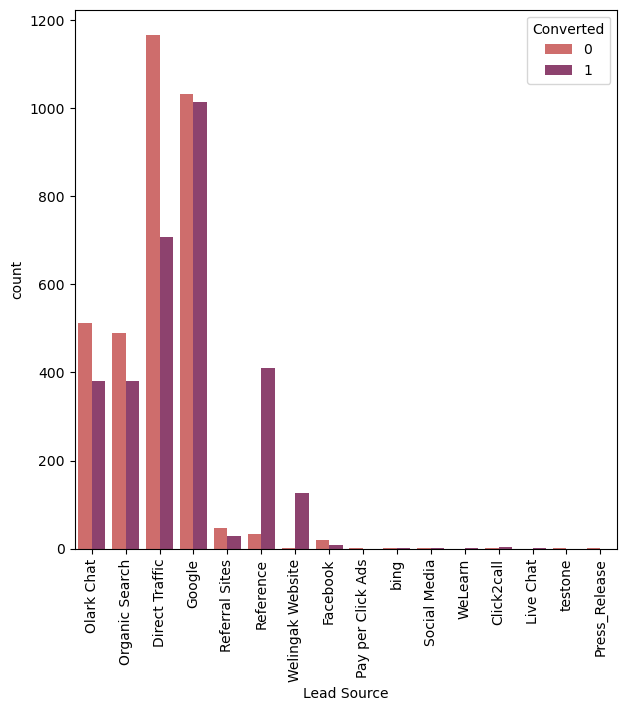

In [3442]:
plt.figure(figsize=[7,7])
sns.countplot(data=df, x = "Lead Source", hue='Converted',palette='flare')
plt.xticks(rotation = 90)
plt.show()

In [3443]:
df['Lead Source'] = df['Lead Source'].replace([ 'Live Chat', 'Pay per Click Ads','bing','Social Media','WeLearn', 'Click2call','Live Chat','testone','Press_Release',], 'Others')

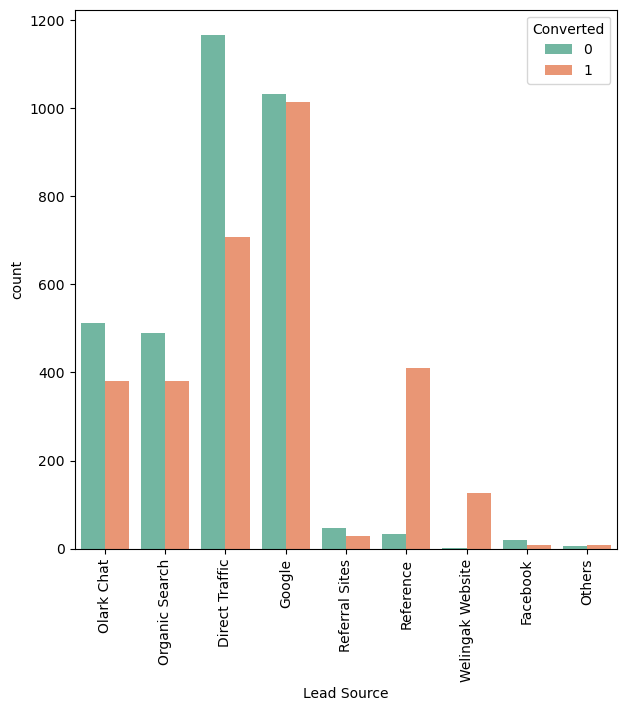

In [3444]:
plt.figure(figsize=[7,7])
sns.countplot(data=df, x = "Lead Source", hue='Converted',palette='Set2')
plt.xticks(rotation = 90)
plt.show()

In [3445]:
# it is clearly seen that the google and direct traffic generate more leads and the conversion rate is also good
# conversion rate of welingak website is also high

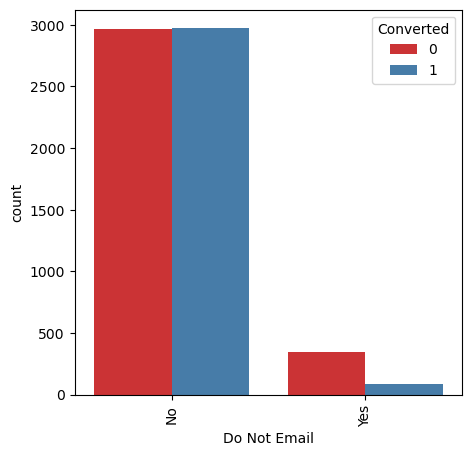

In [3446]:
plt.figure(figsize=[5,5])
sns.countplot(data=df, x = "Do Not Email", hue='Converted', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [3447]:
df['TotalVisits'].describe() #there is huge difference between maximum and minimum values--quite suspicious

count    6373.000000
mean        3.624196
std         5.048555
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

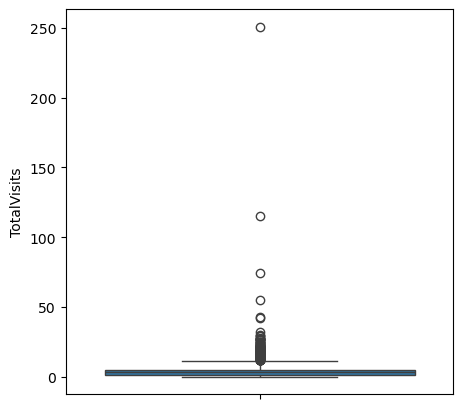

In [3448]:
plt.figure(figsize=[5,5])
sns.boxplot(data=df['TotalVisits'])
plt.show()

In [3449]:
#STATISTICAL METHOD TO REMOVE OUTLIER
Q1=df["TotalVisits"].describe()["25%"]
Q3=df["TotalVisits"].describe()["75%"]
IQR= Q3-Q1
LOWER_BOUND=Q1-1.5*IQR
UPPER_BOUND= Q3+1.5*IQR
df_no_outliers = df[(df['TotalVisits'] >= UPPER_BOUND)]
df["TotalVisits"]=np.where(df["TotalVisits"]>UPPER_BOUND,UPPER_BOUND,df["TotalVisits"])
#df["TotalVisits"]=np.where(df["TotalVisitsTotalVisits"]>LOWER_BOUND,LOWER_BOUND,df["TotalVisits"])

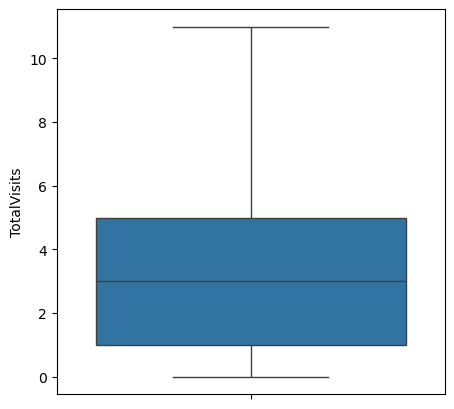

In [3450]:
plt.figure(figsize=[5,5])
sns.boxplot(data=df['TotalVisits'])
plt.show()

In [3451]:
df['TotalVisits'].describe()

count    6373.000000
mean        3.378786
std         2.890109
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        11.000000
Name: TotalVisits, dtype: float64

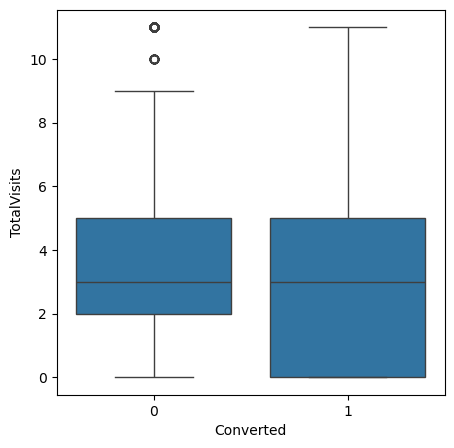

In [3452]:
plt.figure(figsize=[5,5])
sns.boxplot(data=df, x= "Converted", y= "TotalVisits" )
plt.show()

In [3453]:
df.Converted.describe()

count    6373.000000
mean        0.480935
std         0.499676
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Converted, dtype: float64

# as it can be clearly seen from above boxplot that median for converted and not converted is same

##Total Time Spent on Website

In [3456]:
df['Total Time Spent on Website'].describe() #lets plot a boxplot before making any statement

count    6373.000000
mean      535.224541
std       565.374753
min         0.000000
25%        34.000000
50%       287.000000
75%      1022.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

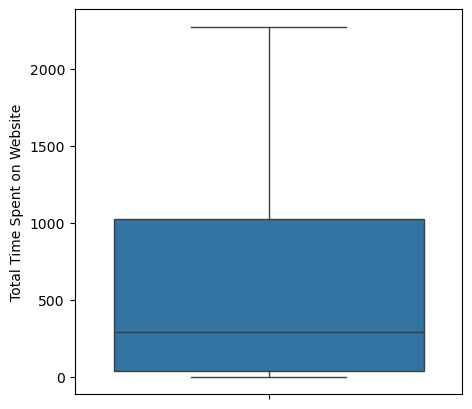

In [3457]:
plt.figure(figsize=[5,5])
sns.boxplot(df['Total Time Spent on Website'])
plt.show()

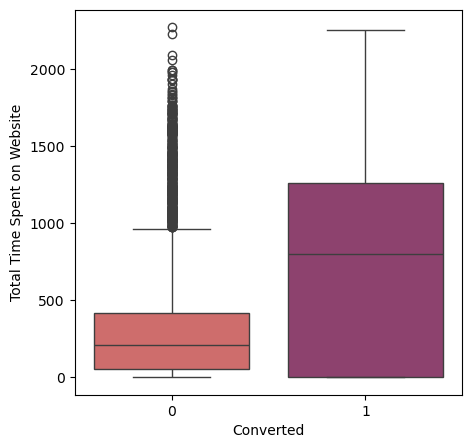

In [3458]:
plt.figure(figsize=[5,5])
sns.boxplot(data= df, x='Converted' , y='Total Time Spent on Website', palette= 'flare')
plt.show()

In [3459]:
#Leads spending more time on the weblise are more likely to be converted.

In [3460]:
df['Page Views Per Visit'].describe() #there is again a huge difference between min and max--first plot a boxplot


count    6373.000000
mean        2.480464
std         2.167364
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        55.000000
Name: Page Views Per Visit, dtype: float64

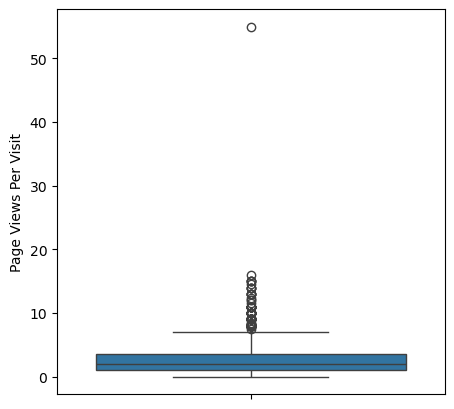

In [3461]:
plt.figure(figsize=[5,5])
sns.boxplot(df["Page Views Per Visit"])
plt.show() #looks like there is a outlier

In [3462]:
#lets first remove it

In [3463]:
#STATISTICAL METHOD TO REMOVE OUTLIER
Q1=df["Page Views Per Visit"].describe()["25%"]
Q3=df["Page Views Per Visit"].describe()["75%"]
IQR= Q3-Q1
LOWER_BOUND=Q1-1.5*IQR
UPPER_BOUND= Q3+1.5*IQR
df_no_outliers = df[(df['Page Views Per Visit'] >= UPPER_BOUND)]
df["Page Views Per Visit"]=np.where(df["Page Views Per Visit"]>UPPER_BOUND,UPPER_BOUND,df["Page Views Per Visit"])

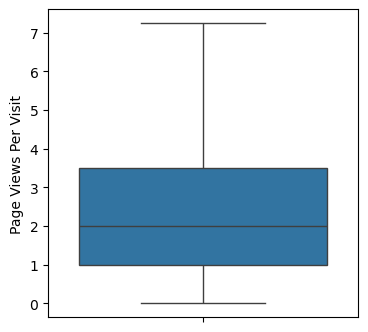

In [3464]:
plt.figure(figsize=[4,4])
sns.boxplot(df["Page Views Per Visit"])
plt.show() #again plotting boxplot

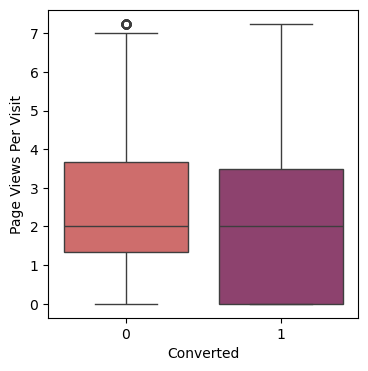

In [3465]:
plt.figure(figsize=[4,4])
sns.boxplot(data= df, y = 'Page Views Per Visit', x = 'Converted', palette="flare")
plt.show()

In [3466]:
#Median for converted and unconverted leads is again the same.


In [3467]:
df['Last Activity'].describe()

count             6373
unique              16
top       Email Opened
freq              2455
Name: Last Activity, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Email Bounced'),
  Text(5, 0, 'Email Link Clicked'),
  Text(6, 0, 'Form Submitted on Website'),
  Text(7, 0, 'Unsubscribed'),
  Text(8, 0, 'Had a Phone Conversation'),
  Text(9, 0, 'View in browser link Clicked'),
  Text(10, 0, 'Olark Chat Conversation'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

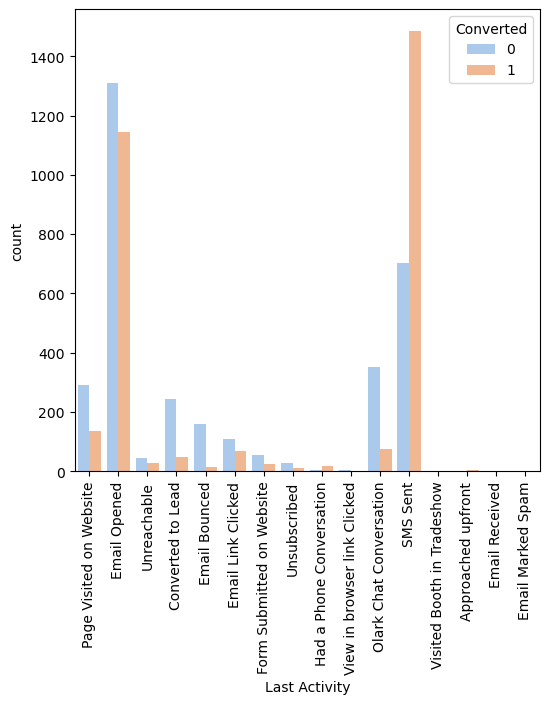

In [3468]:
#lets plot a countplot
plt.figure(figsize=(6,6))
sns.countplot(data=df, x = "Last Activity", hue = "Converted",palette='pastel')
plt.xticks(rotation = 90)

In [3469]:
# again clubbing the last activities to "Other_Activity" which are having less data.
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation','Visited Booth in Tradeshow', 'Approached upfront','Email Received', 'Email Marked Spam'], 'Other_Activity')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Email Bounced'),
  Text(5, 0, 'Email Link Clicked'),
  Text(6, 0, 'Form Submitted on Website'),
  Text(7, 0, 'Unsubscribed'),
  Text(8, 0, 'Other_Activity'),
  Text(9, 0, 'View in browser link Clicked'),
  Text(10, 0, 'Olark Chat Conversation'),
  Text(11, 0, 'SMS Sent')])

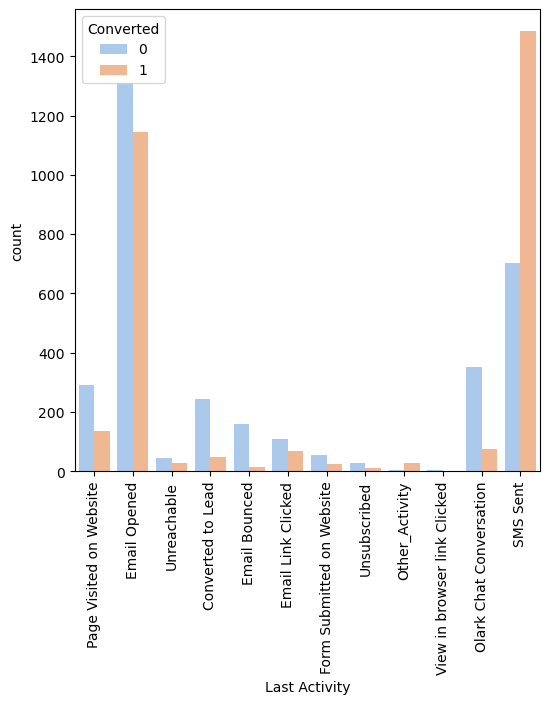

In [3470]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x = "Last Activity", hue = "Converted",palette='pastel')
plt.xticks(rotation = 90)

In [3471]:
# Most of the lead have their Email opened as their last activity.
# Conversion rate for leads with last activity as SMS Sent is high.

In [3472]:
df.Specialization.describe()

count       6373
unique        19
top       Select
freq        1838
Name: Specialization, dtype: object

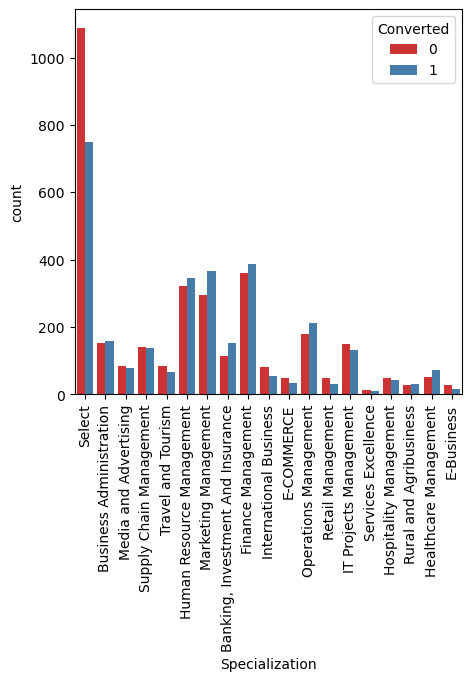

In [3473]:
plt.figure(figsize=[5,5])
sns.countplot(x = "Specialization", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [3474]:
#df['Last Activity'] = df['Last Activity'].replace(['Select'],'Not Specified')

In [3475]:
df['What is your current occupation'].describe()

count           6373
unique             6
top       Unemployed
freq            5476
Name: What is your current occupation, dtype: object

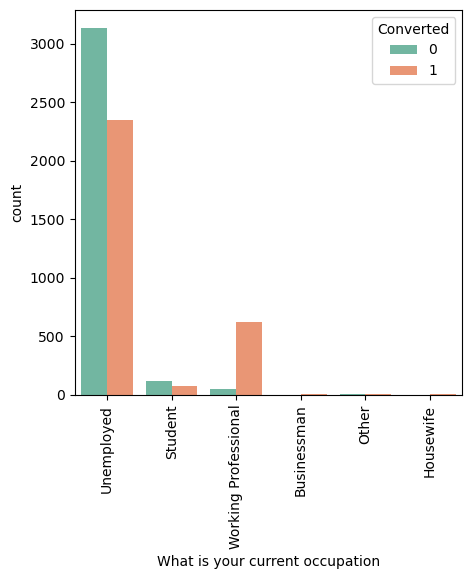

In [3476]:
#plotting countplot
plt.figure(figsize=[5,5])
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df,palette='Set2')
plt.xticks(rotation = 90)
plt.show()

In [3477]:
# Working Professionals going for the course have high chances of joining it.
# Unemployed leads are the most in numbers but also has considerable conversion rate.

In [3478]:
df['A free copy of Mastering The Interview'].describe()

count     6373
unique       2
top         No
freq      4202
Name: A free copy of Mastering The Interview, dtype: object

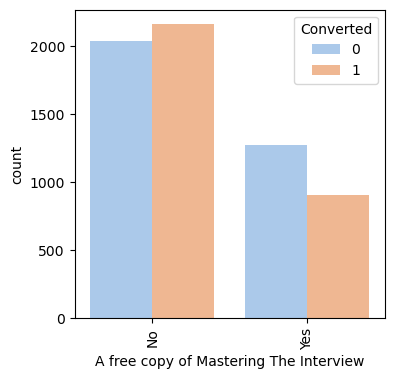

In [3479]:
#plotting countplot
plt.figure(figsize=[4,4])
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df,palette='pastel')
plt.xticks(rotation = 90)
plt.show()

In [3480]:
# both count and conversion rate is high for"No"


In [3481]:
df['Last Notable Activity'].describe()

count             6373
unique              14
top       Email Opened
freq              2038
Name: Last Notable Activity, dtype: object

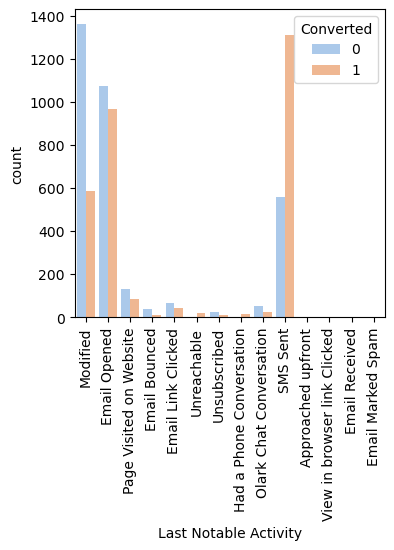

In [3482]:
#plotting countplot
plt.figure(figsize=[4,4])
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df,palette='pastel')
plt.xticks(rotation = 90)
plt.show()

In [3483]:
df['Last Notable Activity']= df['Last Notable Activity'].replace(['Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam'],'others')

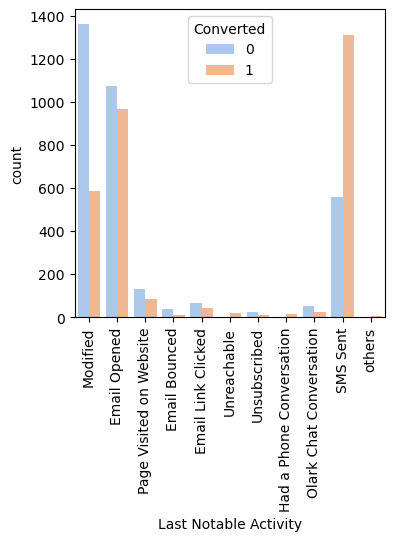

In [3484]:
#plotting countplot
plt.figure(figsize=[4,4])
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df,palette='pastel')
plt.xticks(rotation = 90)
plt.show()

In [3485]:
df.dtypes #checking the types of column

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [3486]:
#vars =  ['Do Not Email']

#def binary_map(x):
    #return x.map({'Yes': 1, "No": 0})

#df[vars] = df[vars].apply(binary_map)

In [3487]:
df.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

### creating dummy variable for categorical feature

In [3489]:
# Checking the columns which are of type 'object'
temp = df.loc[:, df.dtypes == 'object']
temp.columns


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [3490]:
# Demo Cell
df1 = pd.DataFrame({'P': ['p', 'q', 'p']})
df1

,P
0,p
1,q
2,p


In [3491]:
pd.get_dummies(df1)

,P_p,P_q
0,True,False
1,False,True
2,True,False


In [3492]:
pd.get_dummies(df1, prefix=['col1'])

,col1_p,col1_q
0,True,False
1,False,True
2,True,False


In [3493]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source','Do Not Email', 'Last Activity','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [3494]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' 
# which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(df['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(columns=['Specialization_Select'])
df = pd.concat([df,dummy_spl],axis=1)

In [3495]:
#dropping the columns for which dummies were created
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Do Not Email','Specialization','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity'], axis = 1)

In [3496]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,1,2.0,1428,1.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


# Splitting the data into train and test set.

In [3498]:
# Put all the feature variables in X
X = df.drop(columns=['Converted'])
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3499]:
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [3500]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [3501]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 60)
y_train Size (4461,)


# scaling

In [3503]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.363636,0.029489,0.275862,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
218,0.363636,0.082306,0.551724,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4171,0.545455,0.034331,0.827586,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4037,0.000000,0.000000,0.000000,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3660,0.000000,0.000000,0.000000,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3504]:
#looking at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

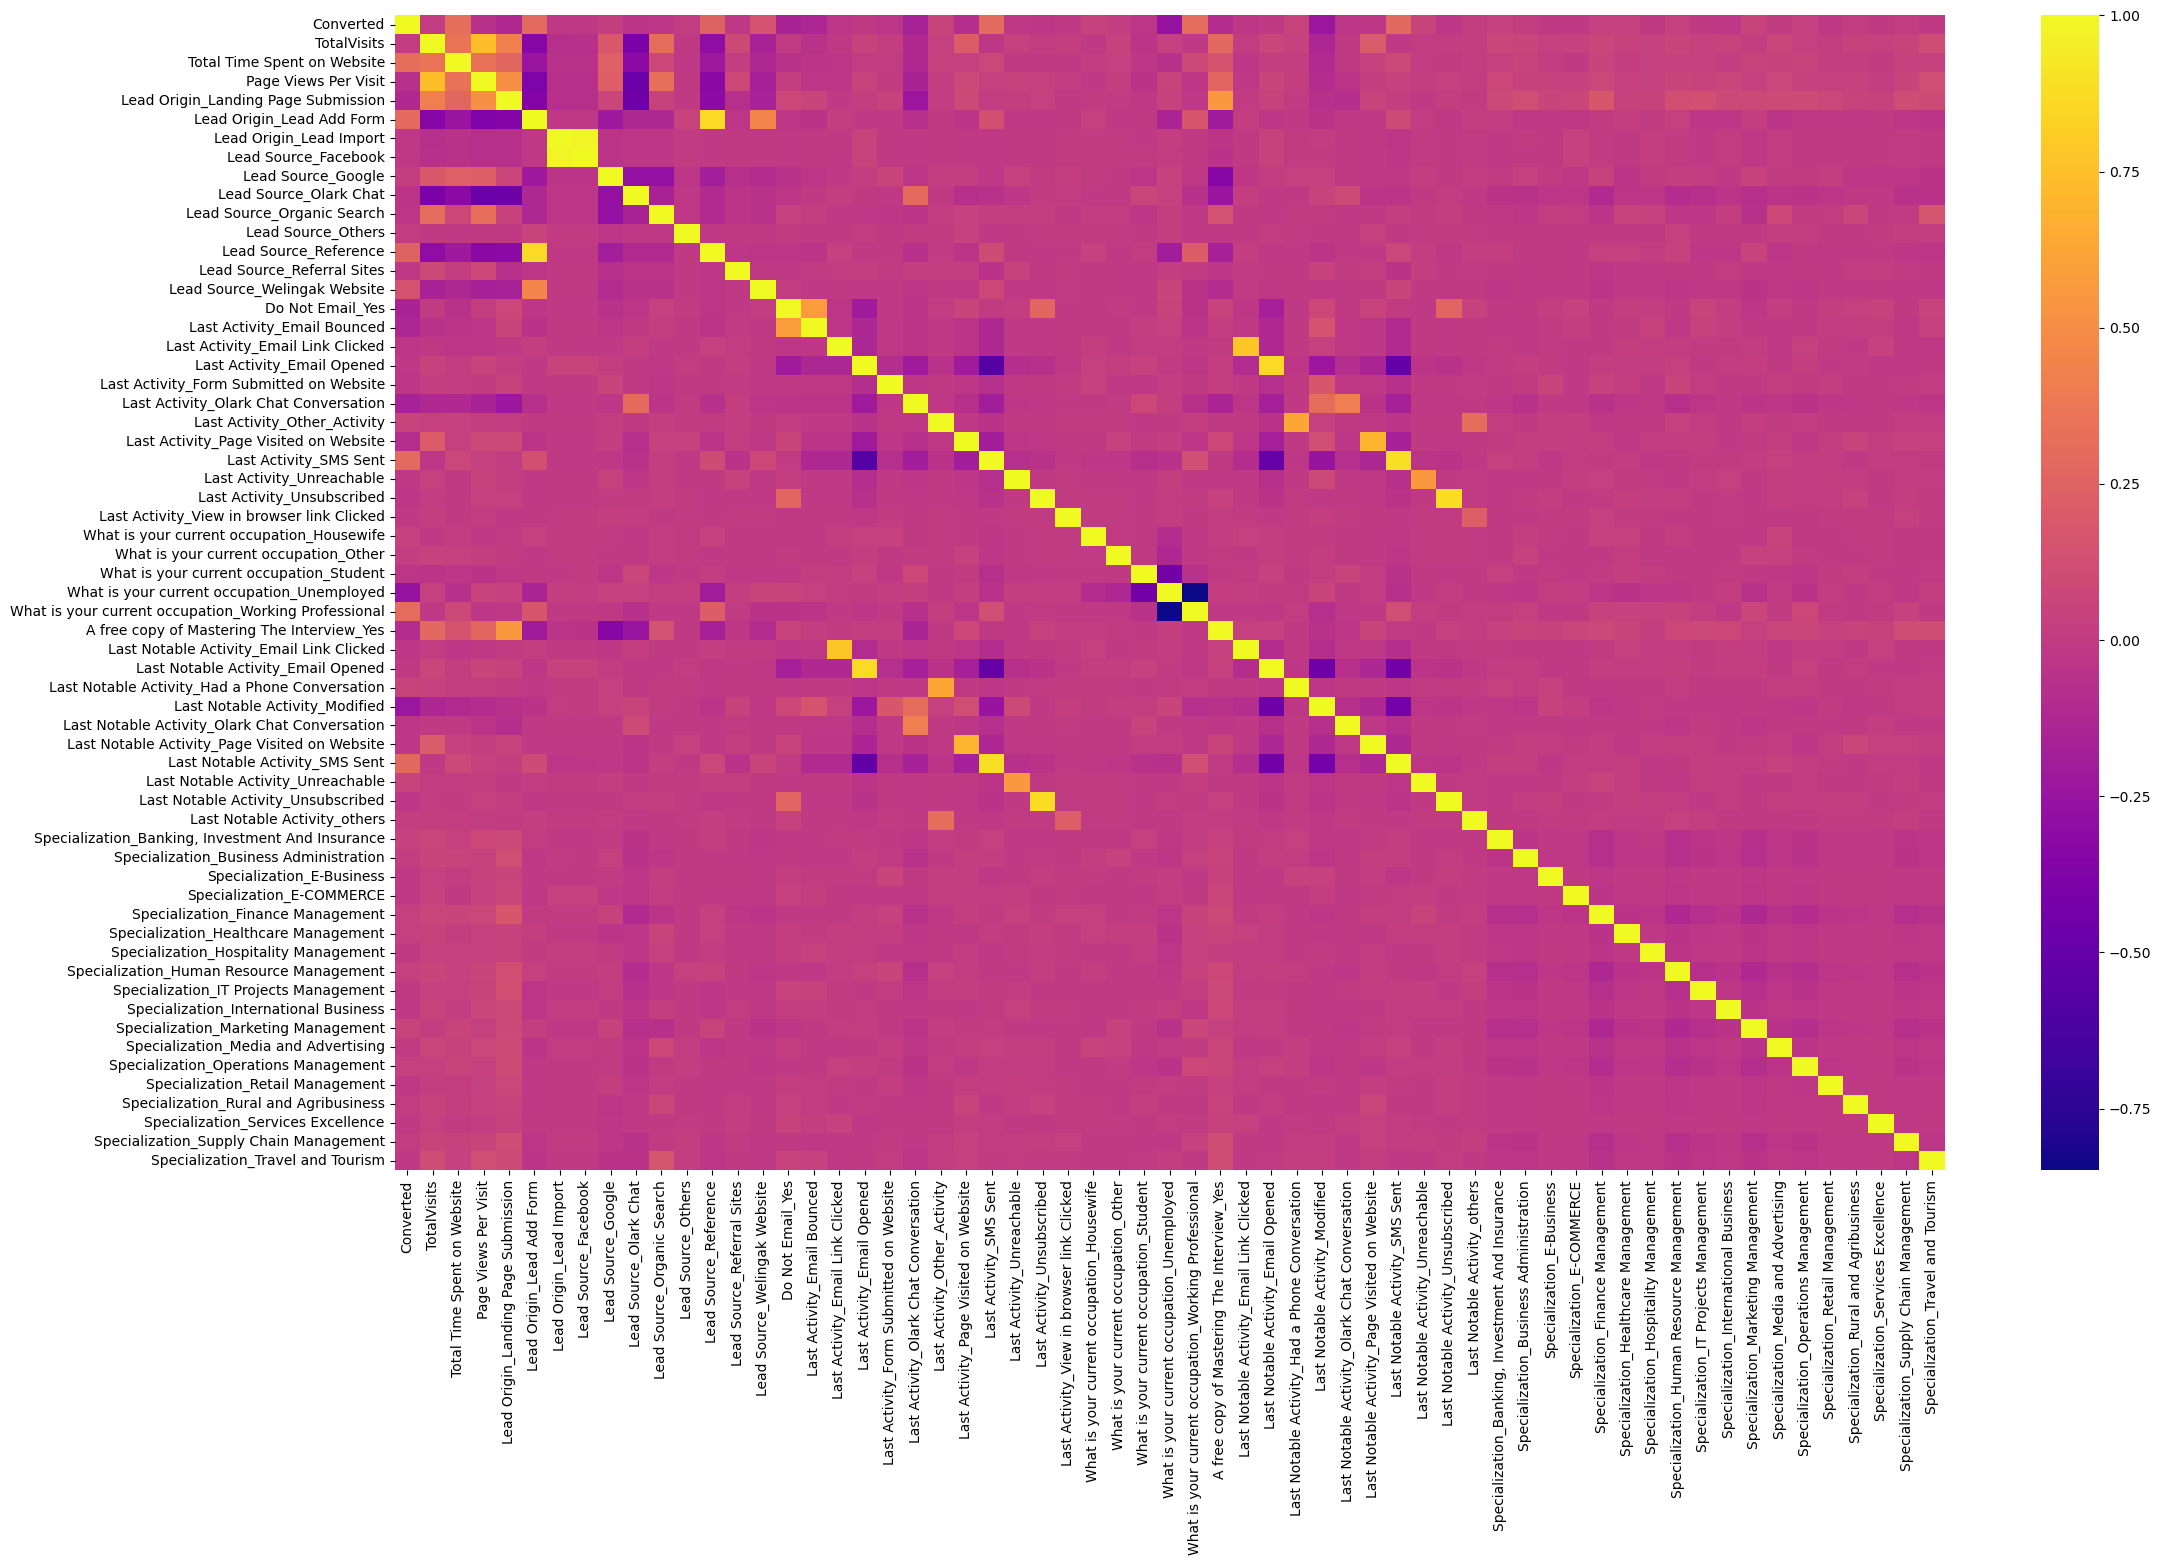

In [3505]:
plt.figure(figsize = (25,15))
sns.heatmap(df.corr(),cmap='plasma')
plt.show()

In [3506]:
logreg = LogisticRegression()

In [3507]:
# Importing the 'RFE' and select 15 variables
rfe = RFE(estimator=logreg, n_features_to_select=15)  # # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [3508]:
 list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Source_Facebook', False, 33),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Others', False, 29),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', False, 26),
 ('Last Activity_Email Link Clicked', False, 32),
 ('Last Activity_Email Opened', False, 9),
 ('Last Activity_Form Submitted on Website', False, 45),
 ('Last Activity_Olark Chat Conversation', False, 4),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 46),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreach

In [3509]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]


In [3510]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [3511]:
print(X_train.dtypes)


TotalVisits                                             float64
Total Time Spent on Website                             float64
Page Views Per Visit                                    float64
Lead Origin_Lead Add Form                                  bool
Lead Source_Olark Chat                                     bool
Lead Source_Reference                                      bool
Lead Source_Welingak Website                               bool
Do Not Email_Yes                                           bool
Last Activity_Other_Activity                               bool
Last Activity_SMS Sent                                     bool
What is your current occupation_Student                    bool
What is your current occupation_Unemployed                 bool
What is your current occupation_Working Professional       bool
Last Notable Activity_Had a Phone Conversation             bool
Last Notable Activity_Unreachable                          bool
dtype: object


In [3512]:
X_train = X_train.astype(int)

In [3513]:
print(X_train.dtypes)

TotalVisits                                             int32
Total Time Spent on Website                             int32
Page Views Per Visit                                    int32
Lead Origin_Lead Add Form                               int32
Lead Source_Olark Chat                                  int32
Lead Source_Reference                                   int32
Lead Source_Welingak Website                            int32
Do Not Email_Yes                                        int32
Last Activity_Other_Activity                            int32
Last Activity_SMS Sent                                  int32
What is your current occupation_Student                 int32
What is your current occupation_Unemployed              int32
What is your current occupation_Working Professional    int32
Last Notable Activity_Had a Phone Conversation          int32
Last Notable Activity_Unreachable                       int32
dtype: object


In [3514]:
print(y_train.dtypes)

int64


### model building

In [3516]:
#model-1
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2434.9
Date:                Mon, 23 Sep 2024   Deviance:                       4869.8
Time:                        17:50:55   Pearson chi2:                 4.87e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2542
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2017      0.521      2.307      0.021       0.181       2.223
TotalVisits                                              0.5780      0.165      3.505      0.000       0.255       0.901
Total Time Spent on Website                            -22.9400   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Page Views Per Visit                                     0.0321      0.232      0.138      0.890      -0.422       0.486
Lead Origin_Lead Add Form                                1.8206      1.143      1.593      0.111      -0.419       4.061
Lead Source_Olark Chat                                   0.1075      0.096      1.118      0.264      -0.081       0.296
Lead Source_Reference                                    1.0253      1.169      0.877      0.381      -1.266       3.317
Lead Source_Welingak Website                             3.0955      1.523      2.032      0.042       0.110       6.081
Do Not Email_Yes                                        -1.5520      0.176     -8.841      0.000      -1.896      -1.208
Last Activity_Other_Activity                             1.5167      0.700      2.167      0.030       0.145       2.888
Last Activity_SMS Sent                                   1.2174      0.074     16.362      0.000       1.072       1.363
What is your current occupation_Student                 -1.8441      0.555     -3.321      0.001      -2.932      -0.756
What is your current occupation_Unemployed              -2.0451      0.522     -3.915      0.000      -3.069      -1.021
What is your current occupation_Working Professional     0.6605      0.553      1.195      0.232      -0.423       1.744
Last Notable Activity_Had a Phone Conversation          21.5385   1.46e+04      0.001      0.999   -2.86e+04    2.86e+04
Last Notable Activity_Unreachable                        2.3872      0.777      3.073      0.002       0.865       3.910
========================================================================================================================
"""

In [3517]:
#There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them.

In [3518]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,84.14
5,Lead Source_Reference,65.13
6,Lead Source_Welingak Website,20.01
8,Last Activity_Other_Activity,1.84
13,Last Notable Activity_Had a Phone Conversation,1.84
11,What is your current occupation_Unemployed,1.82
9,Last Activity_SMS Sent,1.58
12,What is your current occupation_Working Profes...,1.24
4,Lead Source_Olark Chat,1.20
0,TotalVisits,1.08


In [3519]:
#Let's first drop the variable Lead Source_Reference since it has a high p-value as well as a high VIF.

In [3520]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [3521]:
#model 2
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2435.2
Date:                Mon, 23 Sep 2024   Deviance:                       4870.5
Time:                        17:50:55   Pearson chi2:                 4.84e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2541
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2022      0.521      2.308      0.021       0.181       2.223
TotalVisits                                              0.5779      0.165      3.504      0.000       0.255       0.901
Total Time Spent on Website                            -22.9403   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Page Views Per Visit                                     0.0318      0.232      0.137      0.891      -0.422       0.486
Lead Origin_Lead Add Form                                2.8113      0.246     11.434      0.000       2.329       3.293
Lead Source_Olark Chat                                   0.1062      0.096      1.104      0.270      -0.082       0.295
Lead Source_Welingak Website                             2.1045      1.036      2.031      0.042       0.073       4.136
Do Not Email_Yes                                        -1.5509      0.175     -8.841      0.000      -1.895      -1.207
Last Activity_Other_Activity                             1.5167      0.700      2.167      0.030       0.145       2.889
Last Activity_SMS Sent                                   1.2176      0.074     16.365      0.000       1.072       1.363
What is your current occupation_Student                 -1.8434      0.555     -3.321      0.001      -2.931      -0.755
What is your current occupation_Unemployed              -2.0456      0.522     -3.916      0.000      -3.069      -1.022
What is your current occupation_Working Professional     0.6607      0.553      1.196      0.232      -0.422       1.744
Last Notable Activity_Had a Phone Conversation          21.5386   1.46e+04      0.001      0.999   -2.86e+04    2.86e+04
Last Notable Activity_Unreachable                        2.3877      0.777      3.074      0.002       0.865       3.910
========================================================================================================================
"""

In [3522]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis=1, inplace = True)	

In [3523]:
#model 3
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2437.4
Date:                Mon, 23 Sep 2024   Deviance:                       4874.8
Time:                        17:50:55   Pearson chi2:                 4.85e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2534
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2017      0.521      2.307      0.021       0.181       2.223
TotalVisits                                              0.5838      0.165      3.548      0.000       0.261       0.906
Total Time Spent on Website                            -20.9401   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Page Views Per Visit                                     0.0308      0.232      0.133      0.894      -0.423       0.485
Lead Origin_Lead Add Form                                2.8116      0.246     11.435      0.000       2.330       3.294
Lead Source_Olark Chat                                   0.1065      0.096      1.108      0.268      -0.082       0.295
Lead Source_Welingak Website                             2.1044      1.036      2.031      0.042       0.073       4.135
Do Not Email_Yes                                        -1.5510      0.175     -8.842      0.000      -1.895      -1.207
Last Activity_Other_Activity                             2.3536      0.634      3.713      0.000       1.111       3.596
Last Activity_SMS Sent                                   1.2177      0.074     16.367      0.000       1.072       1.364
What is your current occupation_Student                 -1.8431      0.555     -3.320      0.001      -2.931      -0.755
What is your current occupation_Unemployed              -2.0454      0.522     -3.915      0.000      -3.069      -1.021
What is your current occupation_Working Professional     0.6595      0.553      1.194      0.233      -0.423       1.743
Last Notable Activity_Unreachable                        2.3880      0.777      3.074      0.002       0.866       3.910
========================================================================================================================
"""

In [3524]:
X_train.drop('Total Time Spent on Website', axis=1, inplace = True)

In [3525]:
#model-4
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2438.3
Date:                Mon, 23 Sep 2024   Deviance:                       4876.6
Time:                        17:50:55   Pearson chi2:                 4.85e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2531
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2014      0.521      2.307      0.021       0.181       2.222
TotalVisits                                              0.5843      0.165      3.552      0.000       0.262       0.907
Page Views Per Visit                                     0.0317      0.232      0.137      0.891      -0.422       0.486
Lead Origin_Lead Add Form                                2.8124      0.246     11.439      0.000       2.330       3.294
Lead Source_Olark Chat                                   0.1073      0.096      1.117      0.264      -0.081       0.296
Lead Source_Welingak Website                             2.1047      1.036      2.031      0.042       0.074       4.136
Do Not Email_Yes                                        -1.5500      0.175     -8.837      0.000      -1.894      -1.206
Last Activity_Other_Activity                             2.3537      0.634      3.713      0.000       1.111       3.596
Last Activity_SMS Sent                                   1.2156      0.074     16.345      0.000       1.070       1.361
What is your current occupation_Student                 -1.8428      0.555     -3.319      0.001      -2.931      -0.755
What is your current occupation_Unemployed              -2.0454      0.522     -3.915      0.000      -3.069      -1.022
What is your current occupation_Working Professional     0.6601      0.553      1.195      0.232      -0.423       1.743
Last Notable Activity_Unreachable                        2.3882      0.777      3.075      0.002       0.866       3.911
========================================================================================================================
"""

In [3526]:
X_train.drop('What is your current occupation_Working Professional', axis=1, inplace = True)

In [3527]:
#model-5
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2438.9
Date:                Mon, 23 Sep 2024   Deviance:                       4877.9
Time:                        17:50:55   Pearson chi2:                 4.82e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2529
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.7986      0.176     10.240      0.000       1.454       2.143
TotalVisits                                    0.5825      0.165      3.538      0.000       0.260       0.905
Page Views Per Visit                           0.0272      0.232      0.117      0.906      -0.427       0.482
Lead Origin_Lead Add Form                      2.8134      0.246     11.443      0.000       2.332       3.295
Lead Source_Olark Chat                         0.1082      0.096      1.126      0.260      -0.080       0.297
Lead Source_Welingak Website                   2.1034      1.036      2.030      0.042       0.072       4.134
Do Not Email_Yes                              -1.5493      0.175     -8.841      0.000      -1.893      -1.206
Last Activity_Other_Activity                   2.3562      0.634      3.718      0.000       1.114       3.598
Last Activity_SMS Sent                         1.2182      0.074     16.397      0.000       1.073       1.364
What is your current occupation_Student       -2.4405      0.259     -9.412      0.000      -2.949      -1.932
What is your current occupation_Unemployed    -2.6435      0.178    -14.877      0.000      -2.992      -2.295
Last Notable Activity_Unreachable              2.3829      0.777      3.065      0.002       0.859       3.907
==============================================================================================================
"""

In [3528]:
X_train.drop('Page Views Per Visit', axis=1, inplace=True)

In [3529]:
#model-6
X_train_sm = sm.add_constant(X_train)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4450
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2439.0
Date:                Mon, 23 Sep 2024   Deviance:                       4877.9
Time:                        17:50:55   Pearson chi2:                 4.82e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2529
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.7994      0.176     10.252      0.000       1.455       2.143
TotalVisits                                    0.5848      0.163      3.578      0.000       0.265       0.905
Lead Origin_Lead Add Form                      2.8127      0.246     11.444      0.000       2.331       3.294
Lead Source_Olark Chat                         0.1076      0.096      1.121      0.262      -0.080       0.296
Lead Source_Welingak Website                   2.1034      1.036      2.030      0.042       0.072       4.134
Do Not Email_Yes                              -1.5487      0.175     -8.842      0.000      -1.892      -1.205
Last Activity_Other_Activity                   2.3554      0.634      3.717      0.000       1.113       3.597
Last Activity_SMS Sent                         1.2184      0.074     16.407      0.000       1.073       1.364
What is your current occupation_Student       -2.4403      0.259     -9.412      0.000      -2.948      -1.932
What is your current occupation_Unemployed    -2.6437      0.178    -14.880      0.000      -2.992      -2.295
Last Notable Activity_Unreachable              2.3827      0.777      3.065      0.002       0.859       3.906
==============================================================================================================
"""

In [3530]:
X_train.drop('Lead Source_Olark Chat',axis=1, inplace= True)

In [3531]:
#model-7
X_train_sm = sm.add_constant(X_train)
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4451
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2439.6
Date:                Mon, 23 Sep 2024   Deviance:                       4879.2
Time:                        17:50:55   Pearson chi2:                 4.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2526
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.8119      0.175     10.339      0.000       1.468       2.155
TotalVisits                                    0.5713      0.163      3.506      0.000       0.252       0.891
Lead Origin_Lead Add Form                      2.7953      0.245     11.397      0.000       2.315       3.276
Lead Source_Welingak Website                   2.1038      1.036      2.030      0.042       0.073       4.135
Do Not Email_Yes                              -1.5537      0.175     -8.881      0.000      -1.897      -1.211
Last Activity_Other_Activity                   2.3508      0.634      3.710      0.000       1.109       3.593
Last Activity_SMS Sent                         1.2152      0.074     16.383      0.000       1.070       1.361
What is your current occupation_Student       -2.4227      0.259     -9.358      0.000      -2.930      -1.915
What is your current occupation_Unemployed    -2.6372      0.178    -14.847      0.000      -2.985      -2.289
Last Notable Activity_Unreachable              2.3731      0.777      3.053      0.002       0.850       3.897
==============================================================================================================
"""

In [3532]:
X_train.drop('Lead Source_Welingak Website', axis=1, inplace=True)

In [3533]:
#model-8
X_train_sm = sm.add_constant(X_train)
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4452
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2443.4
Date:                Mon, 23 Sep 2024   Deviance:                       4886.8
Time:                        17:50:56   Pearson chi2:                 5.06e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2514
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.8050      0.175     10.297      0.000       1.461       2.149
TotalVisits                                    0.5725      0.163      3.515      0.000       0.253       0.892
Lead Origin_Lead Add Form                      3.1022      0.236     13.144      0.000       2.640       3.565
Do Not Email_Yes                              -1.5450      0.174     -8.885      0.000      -1.886      -1.204
Last Activity_Other_Activity                   2.3518      0.634      3.711      0.000       1.110       3.594
Last Activity_SMS Sent                         1.2182      0.074     16.435      0.000       1.073       1.364
What is your current occupation_Student       -2.4234      0.259     -9.341      0.000      -2.932      -1.915
What is your current occupation_Unemployed    -2.6312      0.178    -14.805      0.000      -2.980      -2.283
Last Notable Activity_Unreachable              2.3702      0.778      3.047      0.002       0.846       3.895
==============================================================================================================
"""

In [3534]:
#now the p-values are less than 0.05

In [3535]:
#lets check the vif values
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,1.51
4,Last Activity_SMS Sent,1.44
1,Lead Origin_Lead Add Form,1.10
2,Do Not Email_Yes,1.07
0,TotalVisits,1.05
3,Last Activity_Other_Activity,1.01
5,What is your current occupation_Student,1.01
7,Last Notable Activity_Unreachable,1.00


In [3536]:
#Since the Pvalue of all variables is almost 0 and VIF values are low for all the variables taking model-8 as our final model

In [3537]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8003    0.596762
218     0.304437
4171    0.304437
4037    0.304437
3660    0.970522
207     0.304437
2044    0.304437
6411    0.858754
6498    0.103077
2085    0.906866
dtype: float64

In [3538]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.59676169, 0.30443684, 0.30443684, 0.30443684, 0.97052247,
       0.30443684, 0.30443684, 0.85875379, 0.10307663, 0.90686621])

### Creating a dataframe with the actual Converted flag and the predicted probabilities



In [3540]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID
0,0,0.596762,8003
1,0,0.304437,218
2,1,0.304437,4171
3,1,0.304437,4037
4,1,0.970522,3660


In [3541]:
#Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

In [3542]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.596762,8003,1
1,0,0.304437,218,0
2,1,0.304437,4171,0
3,1,0.304437,4037,0
4,1,0.970522,3660,1


In [3543]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1835  477]
 [ 761 1388]]


In [3544]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.7224837480385564


In [3545]:
#metrics beyong accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [3546]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.645881805490926


In [3547]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.7936851211072664


In [3548]:
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.20631487889273356


In [3549]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7442359249329759


In [3550]:
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.7068567026194145


In [3551]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [3552]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

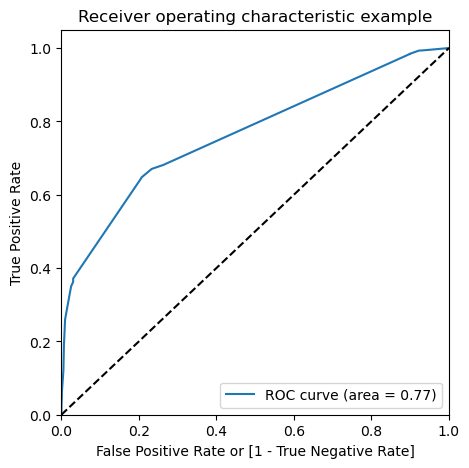

In [3553]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


In [3554]:
# since there is more area under the roc curve i.e 0.77---which shows model is good

In [3555]:
#finding cut-off values
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.596762,8003,1,1,1,1,1,1,1,0,0,0,0
1,0,0.304437,218,0,1,1,1,1,0,0,0,0,0,0
2,1,0.304437,4171,0,1,1,1,1,0,0,0,0,0,0
3,1,0.304437,4037,0,1,1,1,1,0,0,0,0,0,0
4,1,0.970522,3660,1,1,1,1,1,1,1,1,1,1,1


In [3556]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.596762,8003,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.304437,218,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.304437,4171,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.304437,4037,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.970522,3660,1,1,1,1,1,1,1,1,1,1,1,1


In [3557]:
#assigning lead score to the training data
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.596762,8003,1,1,1,1,1,1,1,0,0,0,0,1,60
1,0,0.304437,218,0,1,1,1,1,0,0,0,0,0,0,0,30
2,1,0.304437,4171,0,1,1,1,1,0,0,0,0,0,0,0,30
3,1,0.304437,4037,0,1,1,1,1,0,0,0,0,0,0,0,30
4,1,0.970522,3660,1,1,1,1,1,1,1,1,1,1,1,1,97


# model evaluation

In [3559]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7101546738399462


In [3560]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1704,  608],
       [ 685, 1464]], dtype=int64)

# making predictions on final model

In [3562]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [3563]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Other_Activity,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,0.000000,True,False,True,False,False,False,True,False,False,True,False,False
6122,0.636364,0.029049,0.965517,False,False,False,False,False,False,False,False,True,False,False,False
9202,0.363636,0.416813,0.551724,False,False,False,False,False,False,True,False,True,False,False,False
6570,0.272727,0.378961,0.413793,False,False,False,False,True,False,True,False,True,False,False,False
2668,0.727273,0.395246,0.551724,False,False,False,False,False,False,True,False,True,False,False,False


In [3577]:
X_test = X_test.astype(int)




In [3579]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])

In [3581]:
# Check X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Other_Activity,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
6122,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
6570,1.0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
2668,1.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
6583,1.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
5531,1.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0


In [3583]:
print(X_test_sm.shape)

(1912, 16)


In [3585]:
print(X_train_sm.shape)

(4461, 9)


In [3587]:
X_test.drop(columns=['Lead Source_Reference', 'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Other_Activity,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,0,0,0,1,0,0,0,0,1,0,0,0
6122,0,0,0,0,0,0,0,0,0,0,1,0
9202,0,0,0,0,0,0,0,0,1,0,1,0
6570,0,0,0,0,0,0,1,0,1,0,1,0
2668,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5828,0,0,0,0,0,0,0,0,1,0,1,0
6583,0,0,0,0,0,0,0,0,1,0,1,0
5531,1,0,1,0,0,0,0,0,0,0,1,0
3056,0,0,0,0,0,0,1,0,1,0,1,0


In [3589]:
common_columns = X_train_sm.columns.intersection(X_test_sm.columns)
X_test_sm_aligned = X_test_sm[common_columns]


In [3591]:
X_test_sm_aligned.dtypes

const                                         float64
TotalVisits                                     int32
Lead Origin_Lead Add Form                       int32
Do Not Email_Yes                                int32
Last Activity_Other_Activity                    int32
Last Activity_SMS Sent                          int32
What is your current occupation_Student         int32
What is your current occupation_Unemployed      int32
Last Notable Activity_Unreachable               int32
dtype: object

In [3593]:
X_test_sm_aligned = X_test_sm_aligned.apply(pd.to_numeric, errors='coerce')

In [3595]:
X_test_sm_aligned.dtypes

const                                         float64
TotalVisits                                     int32
Lead Origin_Lead Add Form                       int32
Do Not Email_Yes                                int32
Last Activity_Other_Activity                    int32
Last Activity_SMS Sent                          int32
What is your current occupation_Student         int32
What is your current occupation_Unemployed      int32
Last Notable Activity_Unreachable               int32
dtype: object

In [3597]:
print(X_test_sm_aligned.isnull().sum())
X_test_sm_aligned.fillna(0, inplace=True)  

const                                         0
TotalVisits                                   0
Lead Origin_Lead Add Form                     0
Do Not Email_Yes                              0
Last Activity_Other_Activity                  0
Last Activity_SMS Sent                        0
What is your current occupation_Student       0
What is your current occupation_Unemployed    0
Last Notable Activity_Unreachable             0
dtype: int64


In [3599]:
print(np.isinf(X_test_sm_aligned).sum())

const                                         0
TotalVisits                                   0
Lead Origin_Lead Add Form                     0
Do Not Email_Yes                              0
Last Activity_Other_Activity                  0
Last Activity_SMS Sent                        0
What is your current occupation_Student       0
What is your current occupation_Unemployed    0
Last Notable Activity_Unreachable             0
dtype: int64


In [3601]:
y_test_pred = res.predict(X_test_sm_aligned)
y_test_pred[:10]

4771    0.997818
6122    0.304437
9202    0.596762
6570    0.239934
2668    0.596762
4233    0.814300
3368    0.304437
9091    0.304437
5972    0.596762
3631    0.596762
dtype: float64

In [3603]:
y_pred_1 = pd.DataFrame(y_test_pred)


In [3605]:
y_pred_1.head()

,0
4771,0.997818
6122,0.304437
9202,0.596762
6570,0.239934
2668,0.596762


In [3607]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [3609]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [3611]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [3613]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [3615]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4771,0.997818
1,0,6122,0.304437
2,0,9202,0.596762
3,1,6570,0.239934
4,1,2668,0.596762


In [3617]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [3619]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [3621]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,4771,1,0.997818
1,6122,0,0.304437
2,9202,0,0.596762
3,6570,1,0.239934
4,2668,1,0.596762


In [3623]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [3625]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,4771,1,0.997818,1
1,6122,0,0.304437,0
2,9202,0,0.596762,1
3,6570,1,0.239934,0
4,2668,1,0.596762,1


### recommendations